In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import re
from collections import defaultdict
%matplotlib inline 

In [2]:
!pip install wordcloud

In [3]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
df = pd.read_csv('./amazon_jobs_dataset.csv')
print('dataset loaded')

dataset loaded


In [5]:
df.head(5)

Unnamed: 0                                       Title            location  \
0           0                Software Development Manager    US, WA, Seattle    
1           1               Software Development Engineer  IN, KA, Bangalore    
2           2               Software Development Engineer  IN, KA, Bangalore    
3           3  Software Development Engineer - Amazon Lex    US, WA, Seattle    
4           4  Software Development Engineer - Amazon Lex    US, WA, Seattle    

     Posting_date                                        DESCRIPTION  \
0  March  1, 2018  You are an experienced hands-on manager with a...   
1  March  1, 2018  Amazon is driven by being “the world’s most cu...   
2  March  1, 2018  Amazon is driven by being “the world’s most cu...   
3  March  1, 2018  Have you ever wondered what it takes to build ...   
4  March  1, 2018  Have you ever wondered what it takes to build ...   

                                BASIC QUALIFICATIONS  \
0  · Proven track record of hiring and managing h...   
1  · Bachelor’s Degree in Computer Science or rel...   
2  · Bachelor’s Degree in Computer Science or rel...   
3  · Bachelors Degree in Computer Science or a re...   
4  · Bachelors Degree in Computer Science or a re...   

                            PREFERRED QUALIFICATIONS  
0  · Experience building extremely high volume an...  
1  · Experience building complex software systems...  
2  · Experience building complex software systems...  
3  · Masters or PhD in Computer Science· Experien...  
4  · Masters or PhD in Computer Science· Experien...

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                3493 non-null   int64 
 1   Title                     3493 non-null   object
 2   location                  3493 non-null   object
 3   Posting_date              3493 non-null   object
 4   DESCRIPTION               3484 non-null   object
 5   BASIC QUALIFICATIONS      3484 non-null   object
 6   PREFERRED QUALIFICATIONS  3484 non-null   object
dtypes: int64(1), object(6)
memory usage: 191.1+ KB


In [7]:
#Filter by location
df = df[df['location'].str.contains('Vancouver')]

In [8]:
df = df[df['Title'].str.contains('Software Development Engineer')]

In [9]:
df.Posting_date = pd.to_datetime(df.Posting_date)

In [10]:
tmp = df.groupby([df.Posting_date.dt.year, df.Title]).sum().reset_index().set_index('Posting_date')

In [11]:
tmp = tmp.reset_index()

In [12]:
part1 = pd.DataFrame(tmp)

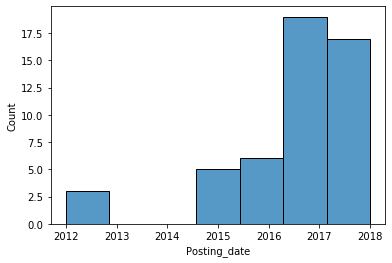

In [13]:
#Nombre de job chez AWS lors des années 2012 a 2018 (Données continues)
sns.histplot(data=part1, x="Posting_date")

In [14]:
#Generate worldcloud to see what comes up
textQualifications = df['PREFERRED QUALIFICATIONS'].values 

In [15]:
toDismiss = ['experience', "and", "with", "in", "to", "or", "a", "of", "related", "Ability", "that", "have", "such as", "at least"]

(-0.5, 799.5, 399.5, -0.5)

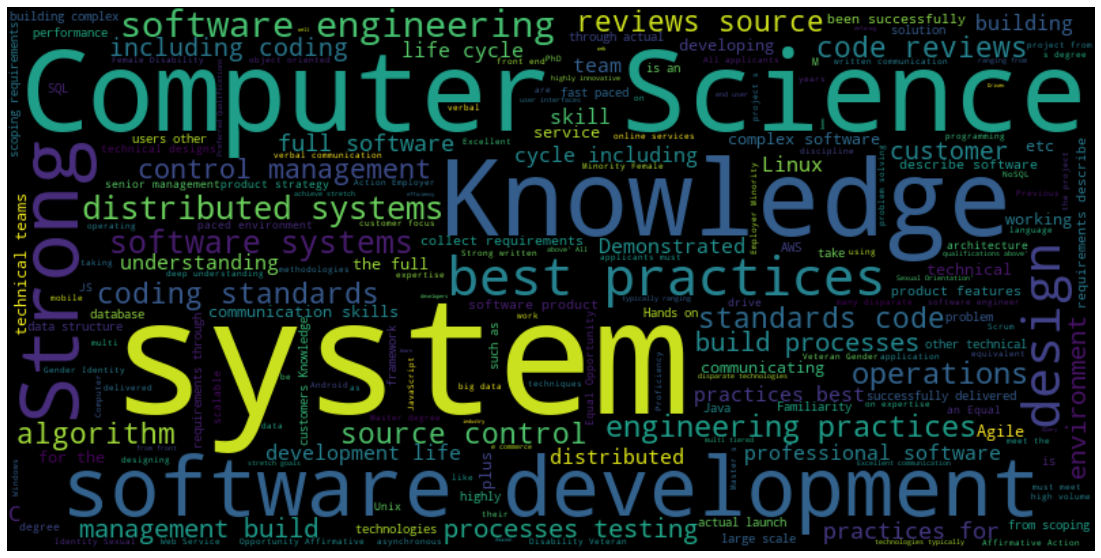

In [16]:
wordcloud = WordCloud(width=800, height=400, stopwords=toDismiss).generate(str(textQualifications))

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [17]:
textBasic = df['BASIC QUALIFICATIONS'].values 

(-0.5, 1599.5, 799.5, -0.5)

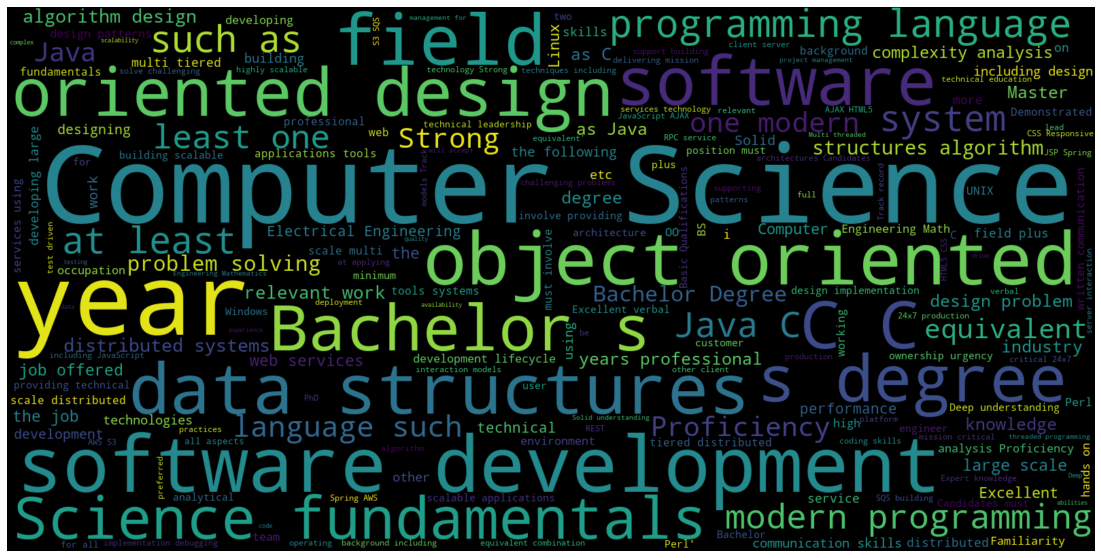

In [18]:
wordcloud = WordCloud(width=1600, height=800, stopwords=toDismiss).generate(str(textBasic))

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [19]:
languages_list = ['swift','matlab','mongodb','hadoop','cosmos', 'mysql','spark', 'pig', 'python', 'java', 'c++', 'php', 'javascript', 'objectivec', 'ruby', 'perl','c','c#']

In [20]:
# get our BASIC QUALIFICATIONS and PREFERRED QUALIFICATIONS columns and and convert all of the values to a list
qualifications = df['BASIC QUALIFICATIONS'].tolist() + df['PREFERRED QUALIFICATIONS'].tolist()

# joining the list to a single string and lower case the letter
qualifications_string = "".join(re.sub('[·,-/’()]', '', str(v)) for v in qualifications).lower()

In [21]:
wordcount = dict((x , 0) for x in languages_list)
for w in re.findall(r"[[\w'+#-]+|[.!?;’]", qualifications_string):
    if w in wordcount:
        wordcount[w] += 1

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Possible nested set at position 1
  


In [22]:
programming_language_popularity = sorted(wordcount.items(), key=lambda kv: kv[1], reverse=True)

In [23]:
# make a new dataframe from programming languages and their popularity
df_popular_programming_lang = pd.DataFrame(programming_language_popularity,columns=['Language','Popularity'])
# Capitalize each programming language first letter
df_popular_programming_lang['Language'] = df_popular_programming_lang.Language.str.capitalize()
df_popular_programming_lang = df_popular_programming_lang[::-1] # all items in the array, reversed

In [24]:
#Check data
df_popular_programming_lang

Language  Popularity
17  Objectivec           0
16         Php           0
15         Pig           0
14      Cosmos           0
13      Matlab           0
12       Swift           0
11       Spark           1
10       Mysql           1
9      Mongodb           1
8       Hadoop           4
7       Python           7
6         Ruby           8
5         Perl          13
4   Javascript          14
3            C          27
2           C#          39
1          C++          55
0         Java          74

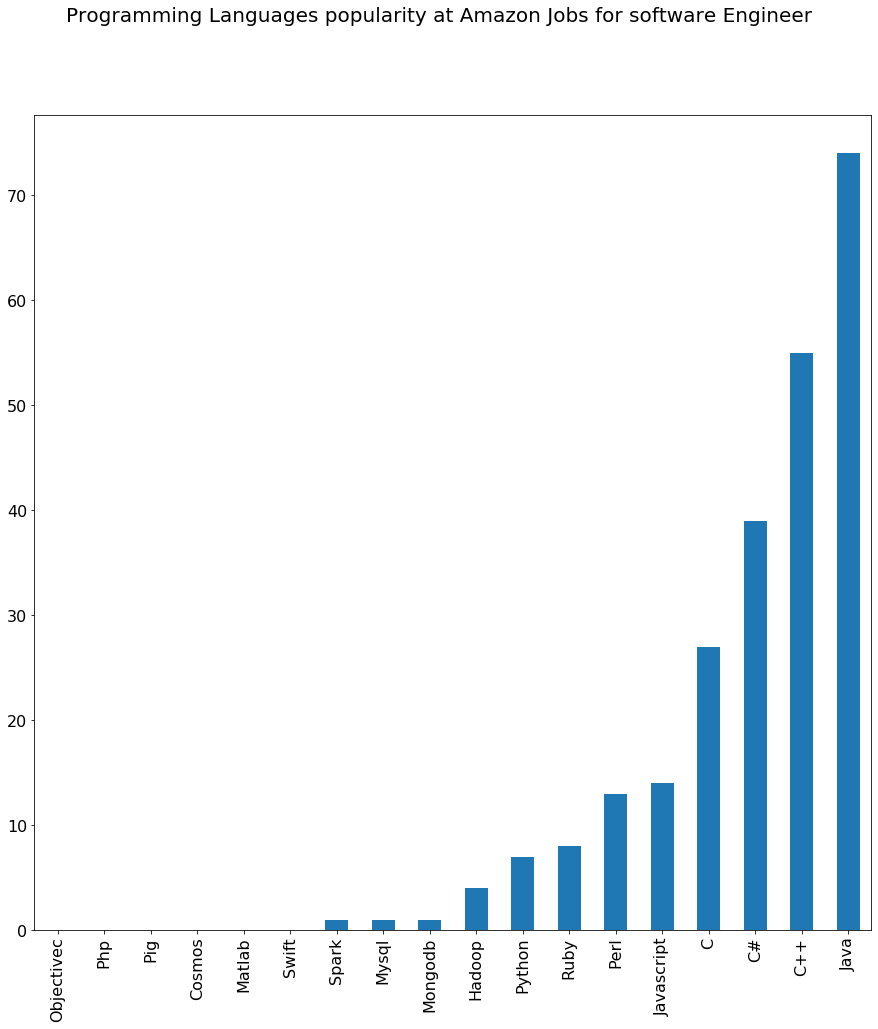

In [25]:
df_popular_programming_lang.plot.bar(x='Language',y='Popularity',figsize=(15,15), legend=False)

plt.suptitle("Programming Languages popularity at Amazon Jobs for software Engineer", fontsize=20)
# set xlabel to ""

plt.xlabel("")

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [26]:
basic_qualifications_string = "".join(re.sub('[·,-/’()]', '', str(v)) for v in qualifications)

In [27]:
years = defaultdict(lambda: 0)

for w in re.findall(r'([0-9]) ', basic_qualifications_string):
     years[w] += 1

In [28]:
years = sorted(years.items(), key=lambda kv: kv[1], reverse=True)

In [29]:
df_years = pd.DataFrame(years,columns=['Years of experience','Popularity'])
df_years = df_years[::-1] 

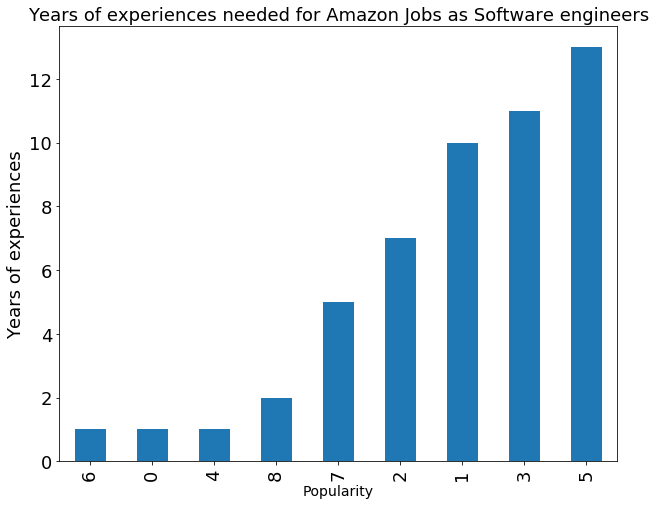

In [30]:
df_years.plot.bar(x='Years of experience',y='Popularity',figsize=(10, 8), legend=False,stacked=True)
# add a suptitle
plt.title("Years of experiences needed for Amazon Jobs as Software engineers", fontsize=18)
# set xlabel to ""
plt.xlabel("Popularity", fontsize=14)
plt.ylabel("Years of experiences",fontsize=18)
# change xticks fontsize to 14
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# finally show the plot
plt.show()